분류기 생성 피처 4개만 사용<br>
모델<br>
동작<br>
학습되는 로스를 시각화 하시오

데이터 로드

In [1]:
from sklearn.datasets import *
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
w_data = load_wine()
data = pd.DataFrame(w_data.data,columns = w_data.feature_names)
data
sy = pd.Series(w_data.target, dtype = 'category')
sy = sy.cat.rename_categories(w_data.target_names)
sy
data['Y'] =sy
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


데이터 시각화 (데이터 분석)

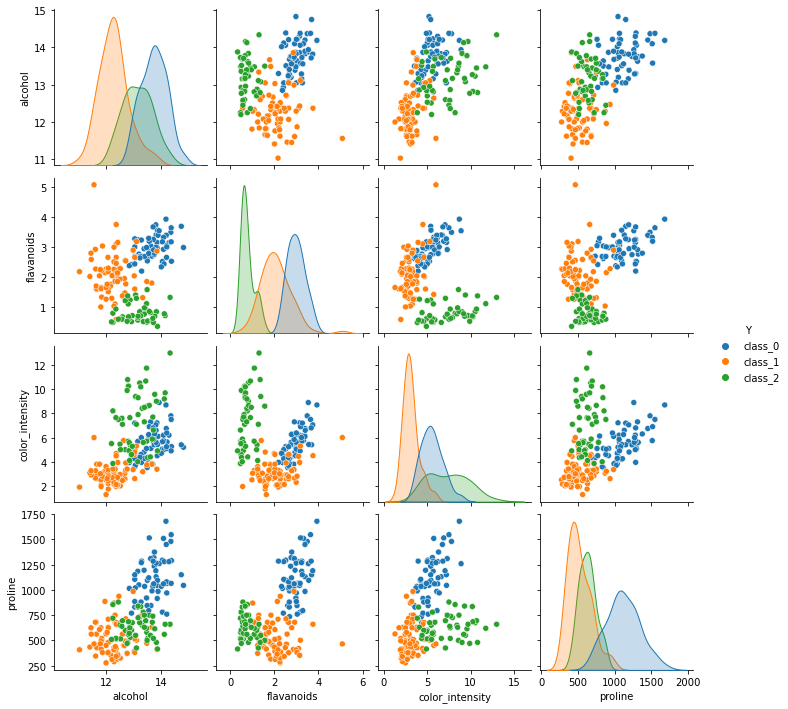

In [3]:
sns.pairplot(vars = ['alcohol','flavanoids','color_intensity','proline'], data=data, hue = 'Y')

데이터 정리

In [4]:
X_data = data[['alcohol','flavanoids','color_intensity','proline']].values
X_data

array([[1.423000e+01, 3.060000e+00, 5.640000e+00, 1.065000e+03],
       [1.320000e+01, 2.760000e+00, 4.380000e+00, 1.050000e+03],
       [1.316000e+01, 3.240000e+00, 5.680000e+00, 1.185000e+03],
       [1.437000e+01, 3.490000e+00, 7.800000e+00, 1.480000e+03],
       [1.324000e+01, 2.690000e+00, 4.320000e+00, 7.350000e+02],
       [1.420000e+01, 3.390000e+00, 6.750000e+00, 1.450000e+03],
       [1.439000e+01, 2.520000e+00, 5.250000e+00, 1.290000e+03],
       [1.406000e+01, 2.510000e+00, 5.050000e+00, 1.295000e+03],
       [1.483000e+01, 2.980000e+00, 5.200000e+00, 1.045000e+03],
       [1.386000e+01, 3.150000e+00, 7.220000e+00, 1.045000e+03],
       [1.410000e+01, 3.320000e+00, 5.750000e+00, 1.510000e+03],
       [1.412000e+01, 2.430000e+00, 5.000000e+00, 1.280000e+03],
       [1.375000e+01, 2.760000e+00, 5.600000e+00, 1.320000e+03],
       [1.475000e+01, 3.690000e+00, 5.400000e+00, 1.150000e+03],
       [1.438000e+01, 3.640000e+00, 7.500000e+00, 1.547000e+03],
       [1.363000e+01, 2.9

In [5]:
Y_data = data['Y'].replace(['class_0', 'class_1', 'class_2'],[0,1,2]).values
Y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [6]:
Y_data = to_categorical(Y_data)
Y_data

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [7]:
X_data.shape,Y_data.shape

((178, 4), (178, 3))

데이터 전처리

In [8]:
t_x,tt_x,t_y,tt_y = train_test_split(X_data,Y_data,random_state=1)
t_x.shape

(133, 4)

In [9]:
m = Sequential()
m.add(Dense(3, input_dim = 4,activation = 'softmax'))
m.compile(optimizer='adam',loss = 'categorical_crossentropy'
          ,metrics=['accuracy'])
hy = m.fit(t_x,t_y,epochs=200,validation_data=(tt_x,tt_y))

Epoch 1/200
5/5 [==============================] - 1s 60ms/step - loss: 335.1887 - accuracy: 0.3083 - val_loss: 254.5557 - val_accuracy: 0.4000
Epoch 2/200
5/5 [==============================] - 0s 6ms/step - loss: 331.0262 - accuracy: 0.3083 - val_loss: 251.3110 - val_accuracy: 0.4000
Epoch 3/200
5/5 [==============================] - 0s 7ms/step - loss: 327.0780 - accuracy: 0.3083 - val_loss: 248.0623 - val_accuracy: 0.4000
Epoch 4/200
5/5 [==============================] - 0s 6ms/step - loss: 322.9294 - accuracy: 0.3083 - val_loss: 244.8466 - val_accuracy: 0.4000
Epoch 5/200
5/5 [==============================] - 0s 7ms/step - loss: 318.9170 - accuracy: 0.3083 - val_loss: 241.5981 - val_accuracy: 0.4000
Epoch 6/200
5/5 [==============================] - 0s 6ms/step - loss: 314.7992 - accuracy: 0.3083 - val_loss: 238.4276 - val_accuracy: 0.4000
Epoch 7/200
5/5 [==============================] - 0s 6ms/step - loss: 310.8556 - accuracy: 0.3083 - val_loss: 235.3155 - val_accuracy: 0.400

Epoch 58/200
5/5 [==============================] - 0s 8ms/step - loss: 108.5868 - accuracy: 0.3083 - val_loss: 74.4235 - val_accuracy: 0.4000
Epoch 59/200
5/5 [==============================] - 0s 7ms/step - loss: 104.7297 - accuracy: 0.3083 - val_loss: 71.2971 - val_accuracy: 0.4000
Epoch 60/200
5/5 [==============================] - 0s 6ms/step - loss: 100.7208 - accuracy: 0.3083 - val_loss: 68.1674 - val_accuracy: 0.4000
Epoch 61/200
5/5 [==============================] - 0s 6ms/step - loss: 96.9018 - accuracy: 0.3083 - val_loss: 65.1173 - val_accuracy: 0.4000
Epoch 62/200
5/5 [==============================] - 0s 6ms/step - loss: 93.0177 - accuracy: 0.3083 - val_loss: 62.0980 - val_accuracy: 0.4000
Epoch 63/200
5/5 [==============================] - 0s 6ms/step - loss: 89.2757 - accuracy: 0.3083 - val_loss: 58.9666 - val_accuracy: 0.4000
Epoch 64/200
5/5 [==============================] - 0s 6ms/step - loss: 85.1902 - accuracy: 0.3083 - val_loss: 55.9844 - val_accuracy: 0.4000
Epo

5/5 [==============================] - 0s 6ms/step - loss: 1.4973 - accuracy: 0.5489 - val_loss: 1.3126 - val_accuracy: 0.5111
Epoch 174/200
5/5 [==============================] - 0s 5ms/step - loss: 1.4959 - accuracy: 0.5338 - val_loss: 1.3123 - val_accuracy: 0.5333
Epoch 175/200
5/5 [==============================] - 0s 6ms/step - loss: 1.4860 - accuracy: 0.5338 - val_loss: 1.3202 - val_accuracy: 0.5333
Epoch 176/200
5/5 [==============================] - 0s 6ms/step - loss: 1.4789 - accuracy: 0.5489 - val_loss: 1.3481 - val_accuracy: 0.5111
Epoch 177/200
5/5 [==============================] - 0s 6ms/step - loss: 1.4519 - accuracy: 0.5489 - val_loss: 1.4119 - val_accuracy: 0.5111
Epoch 178/200
5/5 [==============================] - 0s 6ms/step - loss: 1.4520 - accuracy: 0.5338 - val_loss: 1.3762 - val_accuracy: 0.5111
Epoch 179/200
5/5 [==============================] - 0s 7ms/step - loss: 1.4371 - accuracy: 0.5489 - val_loss: 1.3229 - val_accuracy: 0.5111
Epoch 180/200
5/5 [========

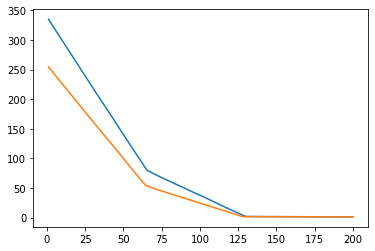

In [10]:
ec = range(1,len(hy.history['accuracy'])+1)
plt.plot(ec,hy.history['loss'])
plt.plot(ec,hy.history['val_loss'])